In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 数据导入

In [2]:
file_path = './犯罪数据.xlsx'
df = pd.read_excel(file_path)
print(df.head())
print(df.columns)

label = '犯罪程度'
categorical_features = ['有无固定职业', '家庭经济状况', '文化程度', '有无特长', '社会关系犯罪记录', '违法记录', '家庭和睦状况', '是否经常赌博']
continuous_features = ['年龄', '犯罪记录次数']

  有无固定职业 家庭经济状况     年龄 文化程度 有无特长 社会关系犯罪记录 违法记录 家庭和睦状况  犯罪记录次数 是否经常赌博 犯罪程度
0      无      差  30-40   初中    否        有    差      有       4      是   严重
1      有      中  20-30   中专    否        无    差      无       0      是   较轻
2      有      差    <20   高中    否        无    中      无       1      否   较轻
3      无      差  30-40   初中    有        无    中      有       1      是   严重
4      无      差    >40   初中    有        有    差      无       2      是   严重
Index(['有无固定职业', '家庭经济状况', '年龄', '文化程度', '有无特长', '社会关系犯罪记录', '违法记录', '家庭和睦状况',
       '犯罪记录次数', '是否经常赌博', '犯罪程度'],
      dtype='object')


### 可视化图形分析犯罪的基本规律

In [3]:
# 保证可以正常显示中文
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

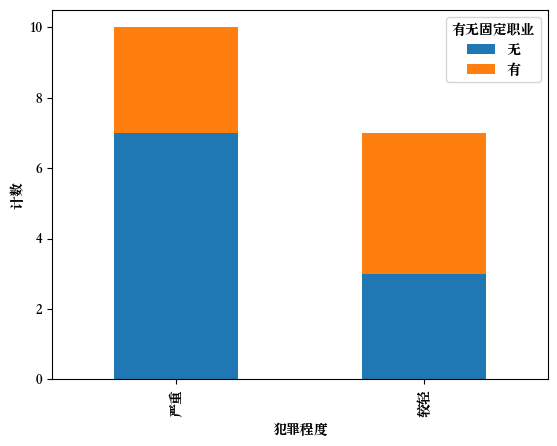

In [4]:
# 柱状图（标称属性）
for feature in list(df.columns):
    if feature == label:
        continue
    
    feature_label_counts = df.groupby([label, feature]).size().unstack()
    feature_label_counts.plot(kind='bar', stacked=True)
    plt.xlabel(label)
    plt.ylabel('计数')
    plt.show()
    
    break

<Axes: xlabel='犯罪记录次数', ylabel='Count'>

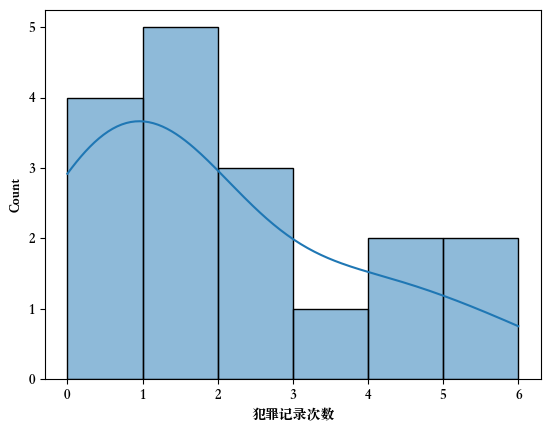

In [5]:
# 直方图
sns.histplot(x='犯罪记录次数',kde=True,data=df)

<Axes: xlabel='家庭经济状况', ylabel='犯罪记录次数'>

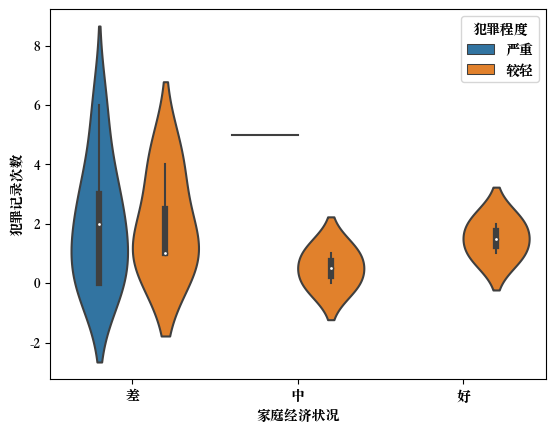

In [6]:
# 小提琴图
sns.violinplot(x='家庭经济状况',y='犯罪记录次数',data=df,hue='犯罪程度')

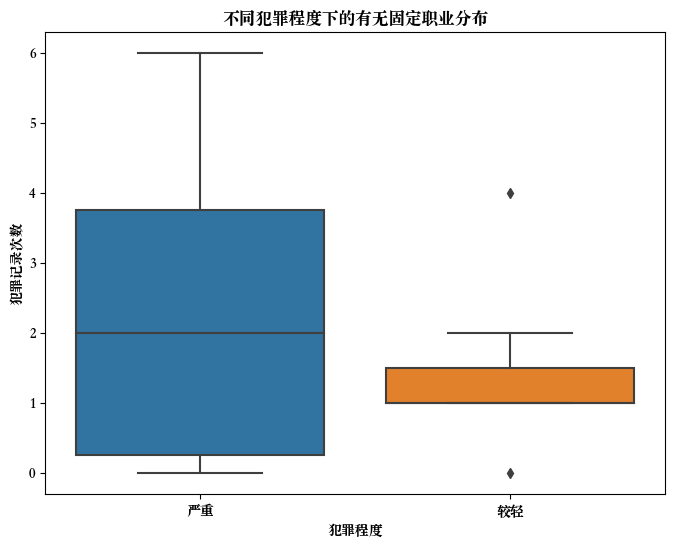

In [7]:
# Boxplot: 适合连续性特征

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='犯罪程度', y='犯罪记录次数')
plt.title('不同犯罪程度下的有无固定职业分布')
plt.xlabel('犯罪程度')
plt.ylabel('犯罪记录次数')
plt.show()

<Axes: xlabel='家庭经济状况', ylabel='犯罪记录次数'>

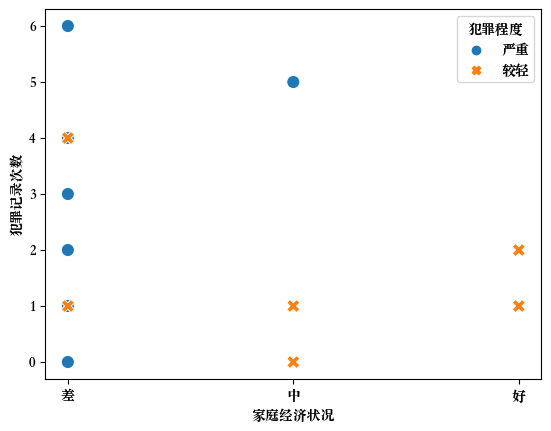

In [8]:
# 散点图：分析两个feature之间的关系
sns.scatterplot(x='家庭经济状况',y='犯罪记录次数',hue='犯罪程度',style='犯罪程度',s=90,data=df)

<Axes: xlabel='犯罪记录次数', ylabel='Density'>

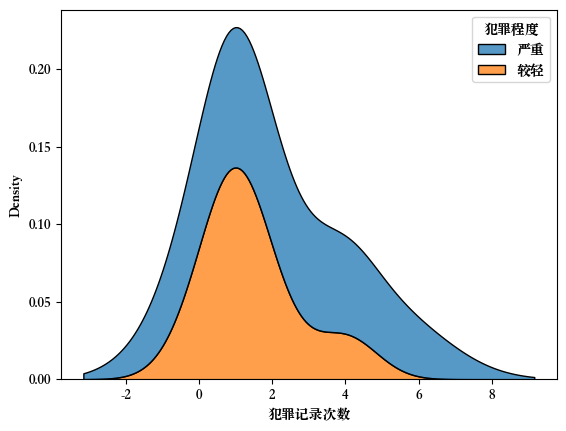

In [9]:
# 密度图
sns.kdeplot(x='犯罪记录次数',data=df,hue='犯罪程度',multiple='stack')

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


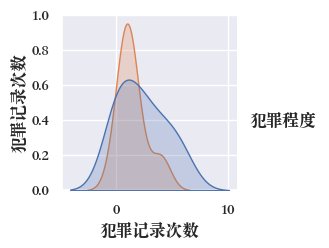

In [13]:
# 配对图

sns.set(rc = {"figure.figsize":(6,3)})
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
sns.pairplot(data=df,hue='犯罪程度')

### ID3算法，给出犯罪严重程度的影响决策树（图形）

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [32]:
# 特征编码（对所有分类特征进行标签编码）
label_encoder = LabelEncoder()
for col in df.columns:
    if col == '犯罪记录次数':
        continue
    df[col] = label_encoder.fit_transform(df[col])

In [33]:
X = df.drop('犯罪程度', axis=1)
y = df['犯罪程度']

In [34]:
id3_classifier = DecisionTreeClassifier(criterion='entropy')  # 默认使用ID3算法

In [35]:
id3_classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

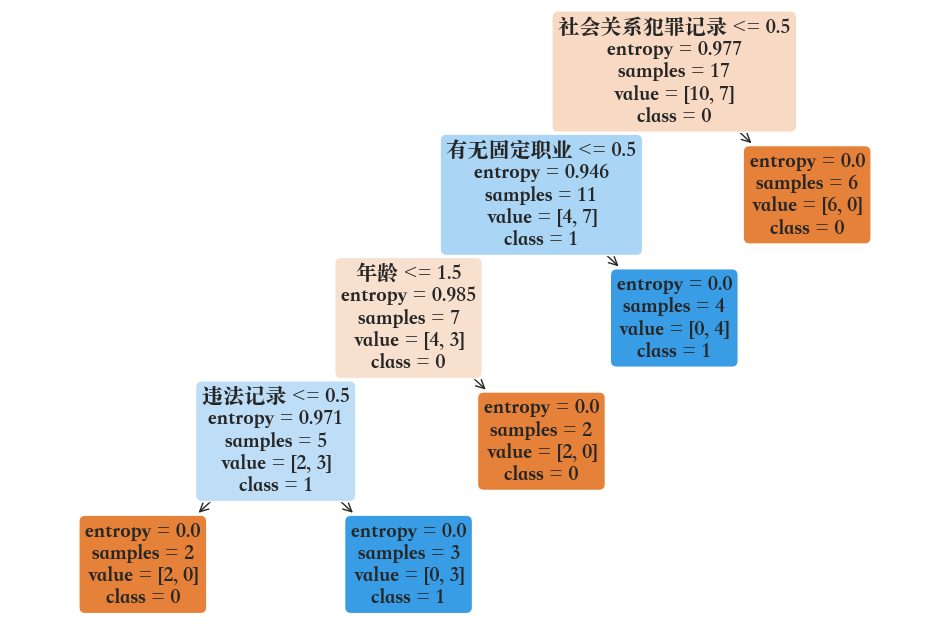

In [37]:
# 可视化决策树
plt.figure(figsize=(12, 8))
plot_tree(id3_classifier, feature_names=X.columns, class_names=list(map(str, y.unique())), filled=True, rounded=True)
plt.show()